<a href="https://colab.research.google.com/github/jackkyboy/AAPL-AMZN-GOOG-Price2018-2020/blob/main/Trade_in_Goods_by_End_use_%2B_Product_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

df = pd.read_csv("/content/TEC_BY_SIZE.csv")
df.head()

,STRUCTURE,STRUCTURE_ID,STRUCTURE_NAME,ACTION,FREQ,Unnamed: 5,REF_AREA,Unnamed: 7,TRADE_FLOW,Unnamed: 9,...,COUNTERPART_AREA,Unnamed: 15,UNIT_MEASURE,Unnamed: 17,TIME_PERIOD,Unnamed: 19,OBS_VALUE,Unnamed: 21,UNIT_MULT,Unnamed: 23
0,DATAFLOW,OECD.STI.PIE:DSD_BTIGE@DF_BTIGE(1.0),NaN,I,A,NaN,PHL,NaN,X,NaN,...,W,NaN,USD,NaN,2023,NaN,32927.7,NaN,3,NaN
1,DATAFLOW,OECD.STI.PIE:DSD_BTIGE@DF_BTIGE(1.0),NaN,I,A,NaN,PHL,NaN,X,NaN,...,W,NaN,USD,NaN,2023,NaN,32927.7,NaN,3,NaN
2,DATAFLOW,OECD.STI.PIE:DSD_BTIGE@DF_BTIGE(1.0),NaN,I,A,NaN,PHL,NaN,X,NaN,...,W,NaN,USD,NaN,2023,NaN,0.4,NaN,3,NaN
3,DATAFLOW,OECD.STI.PIE:DSD_BTIGE@DF_BTIGE(1.0),NaN,I,A,NaN,PHL,NaN,X,NaN,...,W,NaN,USD,NaN,2023,NaN,1203469.8,NaN,3,NaN
4,DATAFLOW,OECD.STI.PIE:DSD_BTIGE@DF_BTIGE(1.0),NaN,I,A,NaN,PHL,NaN,X,NaN,...,W,NaN,USD,NaN,2023,NaN,11577.7,NaN,3,NaN


In [2]:
df["REF_AREA"].unique()

array(['PHL', 'KHM', 'LAO', 'MYS', 'SGP', 'IDN', 'THA', 'MMR', 'KOR',
       'GBR', 'POL', 'MEX', 'FRA', 'JPN', 'AUS', 'DEU'], dtype=object)

In [3]:
df["END_USE"].unique()

array(['XCARS', 'XPRCS', 'XPHONE', 'XOIL', 'XPC', 'XMEDIC', 'WASTE',
       'TOTAL', 'MIXED', 'CAP', 'INT', 'CONS'], dtype=object)

In [4]:
df["PRODUCT"].unique()[:20]

array(['CPA_2_1_MHRD', 'CPA_2_1_C29_30', 'CPA_2_1_R90T92',
       'CPA_2_1_B072_C24XFER', 'CPA_2_1_C32', 'CPA_2_1_C24_25',
       'CPA_2_1_MLRD', 'CPA_2_1_C32X325', 'CPA_2_1_B', 'CPA_2_1_A',
       'CPA_2_1_C26ICT', 'CPA_2_1_LRD', 'CPA_2_1_A03', 'CPA_2_1_C26',
       'CPA_2_1_C26T28', 'CPA_2_1_C263', 'CPA_2_1_OTH', 'CPA_2_1_HRD',
       'CPA_2_1_MRD', 'CPA_2_1_B07'], dtype=object)

In [5]:
import pandas as pd

# 1) อ่านไฟล์ดิบ
raw = pd.read_csv("/content/TEC_BY_SIZE.csv")

print(raw.columns)

Index(['STRUCTURE', 'STRUCTURE_ID', 'STRUCTURE_NAME', 'ACTION', 'FREQ',
       'Unnamed: 5', 'REF_AREA', 'Unnamed: 7', 'TRADE_FLOW', 'Unnamed: 9',
       'END_USE', 'Unnamed: 11', 'PRODUCT', 'Unnamed: 13', 'COUNTERPART_AREA',
       'Unnamed: 15', 'UNIT_MEASURE', 'Unnamed: 17', 'TIME_PERIOD',
       'Unnamed: 19', 'OBS_VALUE', 'Unnamed: 21', 'UNIT_MULT', 'Unnamed: 23'],
      dtype='object')


In [6]:
# 2) ตัดทุกคอลัมน์ที่เป็น Unnamed ออก
df = raw.loc[:, ~raw.columns.str.contains("Unnamed")].copy()

print(df.columns)

Index(['STRUCTURE', 'STRUCTURE_ID', 'STRUCTURE_NAME', 'ACTION', 'FREQ',
       'REF_AREA', 'TRADE_FLOW', 'END_USE', 'PRODUCT', 'COUNTERPART_AREA',
       'UNIT_MEASURE', 'TIME_PERIOD', 'OBS_VALUE', 'UNIT_MULT'],
      dtype='object')


In [7]:
# 3) ฟิลเตอร์เฉพาะข้อมูลจริง (STRUCTURE == 'DATAFLOW')
df = df[df["STRUCTURE"] == "DATAFLOW"].copy()

# 4) ทำ type ให้เรียบร้อย
df["TIME_PERIOD"] = pd.to_numeric(df["TIME_PERIOD"], errors="coerce").astype("Int64")
df["OBS_VALUE"]   = pd.to_numeric(df["OBS_VALUE"], errors="coerce")
df["UNIT_MULT"]   = pd.to_numeric(df["UNIT_MULT"], errors="coerce")

# 5) แปลงหน่วยเงิน (10^UNIT_MULT)
df["value_usd"] = df["OBS_VALUE"] * (10 ** df["UNIT_MULT"])

# 6) เลือกเฉพาะ export (TRADE_FLOW = 'X') และช่วงปีที่สนใจ
df = df[(df["TRADE_FLOW"] == "X") & (df["TIME_PERIOD"].between(2014, 2024))]

In [8]:
print(sorted(df["REF_AREA"].unique()))

['AUS', 'DEU', 'FRA', 'GBR', 'IDN', 'JPN', 'KHM', 'KOR', 'LAO', 'MEX', 'MMR', 'MYS', 'PHL', 'POL', 'SGP', 'THA']


In [9]:
trade = df[[
    "REF_AREA",        # ประเทศ
    "TIME_PERIOD",     # ปี
    "END_USE",         # ประเภท end-use / product group
    "PRODUCT",         # CPA product (ถ้าจะใช้รายละเอียดลึก)
    "COUNTERPART_AREA",# คู่ค้า (ถ้าจะใช้ภายหลัง)
    "value_usd"
]].rename(columns={
    "REF_AREA": "country",
    "TIME_PERIOD": "year",
})

In [10]:
trade_by_enduse = (
    trade
    .groupby(["country", "year", "END_USE"], as_index=False)
    .agg(export_value_usd=("value_usd", "sum"))
)

print(trade_by_enduse.head())

  country  year END_USE  export_value_usd
0     AUS  2014     CAP      3.990284e+10
1     AUS  2014    CONS      1.063224e+11
2     AUS  2014     INT      9.984065e+11
3     AUS  2014   MIXED      1.463931e+11
4     AUS  2014   TOTAL      1.310610e+12


In [11]:
focus_countries = ["THA", "KOR", "MYS", "IDN", "PHL", "VNM"]  # เพิ่ม/ลดได้ตามใจ

sub = trade_by_enduse[
    (trade_by_enduse["year"] == 2023) &
    (trade_by_enduse["country"].isin(focus_countries))
].copy()

# รวมมูลค่าต่อประเทศ
total_by_cty = (
    sub.groupby("country")["export_value_usd"]
       .sum()
       .rename("total_export")
)

sub = sub.merge(total_by_cty, on="country")
sub["share_pct"] = sub["export_value_usd"] / sub["total_export"] * 100

print(sub.sort_values(["country", "share_pct"], ascending=[True, False]).head(30))

   country  year END_USE  export_value_usd  total_export  share_pct
4      IDN  2023   TOTAL      1.411934e+12  2.901987e+12  48.654054
2      IDN  2023     INT      1.023051e+12  2.901987e+12  35.253458
1      IDN  2023    CONS      2.411689e+11  2.901987e+12   8.310476
3      IDN  2023   MIXED      7.819619e+10  2.901987e+12   2.694575
0      IDN  2023     CAP      6.944058e+10  2.901987e+12   2.392864
6      IDN  2023   XCARS      3.032308e+10  2.901987e+12   1.044908
8      IDN  2023    XOIL      2.665101e+10  2.901987e+12   0.918371
5      IDN  2023   WASTE      8.480157e+09  2.901987e+12   0.292219
11     IDN  2023   XPRCS      5.569004e+09  2.901987e+12   0.191903
7      IDN  2023  XMEDIC      3.049504e+09  2.901987e+12   0.105083
10     IDN  2023  XPHONE      2.182327e+09  2.901987e+12   0.075201
9      IDN  2023     XPC      1.941119e+09  2.901987e+12   0.066889
16     KOR  2023   TOTAL      3.663989e+12  8.132349e+12  45.054495
14     KOR  2023     INT      2.186749e+12  8.13

In [12]:
pivot = sub.pivot_table(
    index="country",
    columns="END_USE",
    values="share_pct",
    aggfunc="sum"
).round(2)

print(pivot)

END_USE   CAP  CONS    INT  MIXED  TOTAL  WASTE  XCARS  XMEDIC  XOIL   XPC  \
country                                                                      
IDN      2.39  8.31  35.25   2.69  48.65   0.29   1.04    0.11  0.92  0.07   
KOR      6.18  2.09  26.89   9.89  45.05   0.13   4.20    0.06  3.75  1.37   
MYS      4.89  3.24  32.72   6.08  46.99   0.30   0.05    0.05  4.37  1.14   
PHL      5.89  4.47  35.96   2.45  48.78   0.52   0.02    0.03  0.00  0.98   
THA      7.39  9.79  20.95   7.92  46.04   0.52   1.88    0.08  1.56  2.11   

END_USE  XPHONE  XPRCS  
country                 
IDN        0.08   0.19  
KOR        0.26   0.12  
MYS        0.06   0.11  
PHL        0.01   0.89  
THA        0.14   1.64  


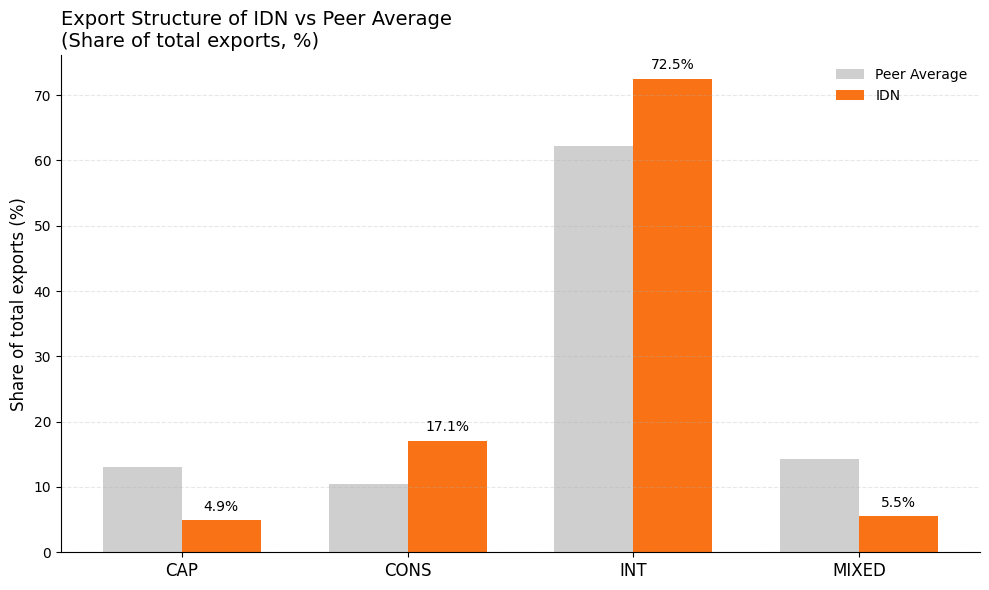

In [27]:
import matplotlib.pyplot as plt
import numpy as np

# ====== เตรียมคอลัมน์ ======
cols_main = ["CAP", "CONS", "INT", "MIXED"]

# ====== เลือกประเทศโฟกัส (แก้ตรงนี้) ======
focus_country = pivot.index[0]  # หรือ THA, IDN, KOR ตามต้องการ

# ====== คำนวณ share (%) ======
pivot_plot = pivot.copy()
pivot_plot["TOTAL"] = pivot_plot["TOTAL"].astype(float)

share = pivot_plot[cols_main].div(pivot_plot["TOTAL"], axis=0) * 100

# ====== แยก focus vs peers ======
focus_share = share.loc[focus_country]
peer_mean = share.drop(index=focus_country).mean()

x = np.arange(len(cols_main))
width = 0.35

# ====== วาดกราฟ ======
plt.figure(figsize=(10, 6))

plt.bar(x - width/2, peer_mean.values, width,
        label="Peer Average", color="#A1A1A1", alpha=0.5)

plt.bar(x + width/2, focus_share.values, width,
        label=focus_country, color="#F97316")

# ====== ตั้งค่าแกน ======
plt.xticks(x, cols_main, fontsize=12)
plt.ylabel("Share of total exports (%)", fontsize=12)

# ====== หัวข้อแบบ SWD ======
plt.title(
    f"Export Structure of {focus_country} vs Peer Average\n(Share of total exports, %)",
    fontsize=14, loc="left"
)

# ====== เพิ่มตัวเลขบนแท่งประเทศโฟกัส ======
for i, v in enumerate(focus_share.values):
    plt.text(x[i] + width/2, v + 1, f"{v:.1f}%",
             ha="center", va="bottom", fontsize=10)

# ====== Declutter แบบ SWD ======
plt.grid(axis="y", linestyle="--", alpha=0.3)
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)

plt.legend(frameon=False)
plt.tight_layout()
plt.show()

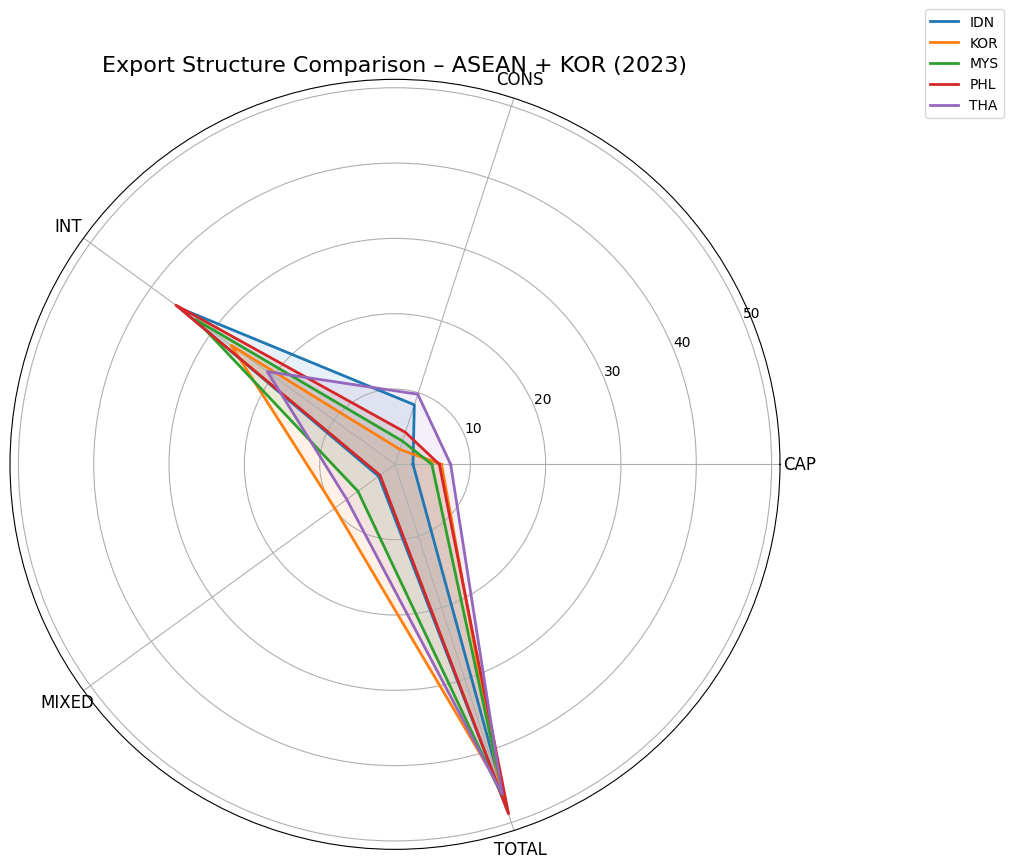

In [28]:
import matplotlib.pyplot as plt
import numpy as np

pivot_plot = pivot.copy()

# เลือกเฉพาะหมวดหลัก เพื่อให้ Radar ไม่รก
cols_main = ["CAP", "CONS", "INT", "MIXED", "TOTAL"]
pivot_main = pivot_plot[cols_main]

countries = pivot_main.index
labels = cols_main
angles = np.linspace(0, 2*np.pi, len(labels), endpoint=False).tolist()
angles += angles[:1]

plt.figure(figsize=(10, 10))
plt.subplot(111, polar=True)

for country in countries:
    values = pivot_main.loc[country].tolist()
    values += values[:1]
    plt.plot(angles, values, linewidth=2, label=country)
    plt.fill(angles, values, alpha=0.1)

plt.xticks(angles[:-1], labels, fontsize=12)
plt.title("Export Structure Comparison – ASEAN + KOR (2023)", fontsize=16)
plt.legend(loc="upper right", bbox_to_anchor=(1.3, 1.1))
plt.show()

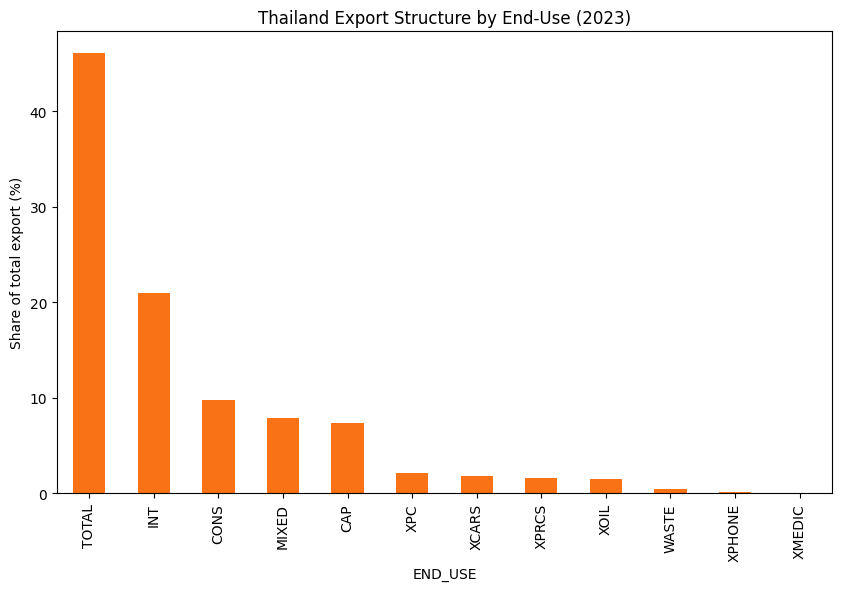

In [24]:
pivot.loc["THA"].sort_values(ascending=False).plot(
    kind="bar",
    figsize=(10,6),
    title="Thailand Export Structure by End-Use (2023)",
    ylabel="Share of total export (%)",
    color="#f97316"
)
plt.show()

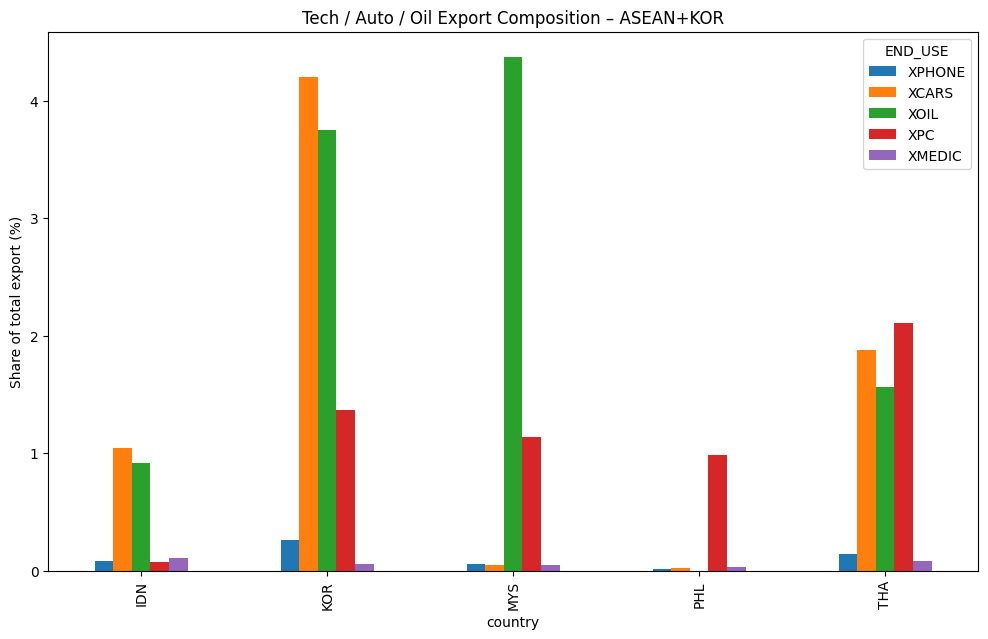

In [15]:
focus_cols = ["XPHONE","XCARS","XOIL","XPC","XMEDIC"]

pivot[focus_cols].plot(
    kind="bar",
    figsize=(12,7),
    title="Tech / Auto / Oil Export Composition – ASEAN+KOR",
)
plt.ylabel("Share of total export (%)")
plt.show()

In [17]:
print(X.dtypes)
print(y.dtype)

ln_total_export    float64
year_trend           Int64
country_DEU           bool
country_FRA           bool
country_GBR           bool
country_IDN           bool
country_JPN           bool
country_KHM           bool
country_KOR           bool
country_LAO           bool
country_MEX           bool
country_MMR           bool
country_MYS           bool
country_PHL           bool
country_POL           bool
country_SGP           bool
country_THA           bool
dtype: object
float64


In [18]:
import numpy as np
import pandas as pd
import statsmodels.api as sm

# ==============================
# 1. สร้าง panel: total export และ share ตาม END_USE
# ==============================

# total export ต่อประเทศ-ปี (ใช้ END_USE == 'TOTAL' โดยตรง)
total_panel = (
    trade_by_enduse[trade_by_enduse["END_USE"] == "TOTAL"]
    .rename(columns={"export_value_usd": "total_export"})
    [["country", "year", "total_export"]]
)

# เลือกเฉพาะ end-use หลัก (ปรับเพิ่มได้)
core_uses = ["INT", "CONS", "CAP", "MIXED"]
core_panel = trade_by_enduse[trade_by_enduse["END_USE"].isin(core_uses)].copy()

# merge กับ total
core_panel = core_panel.merge(total_panel, on=["country", "year"], how="left")

# คำนวณ share (% ของ total export)
core_panel["share_pct"] = core_panel["export_value_usd"] / core_panel["total_export"] * 100

# ==============================
# 2. เตรียมข้อมูลเฉพาะ INT share เพื่อสร้างโมเดล
# ==============================

int_panel = core_panel[core_panel["END_USE"] == "INT"].copy()
int_panel = int_panel.dropna(subset=["total_export", "share_pct"])

# ฟีเจอร์พื้นฐาน
int_panel["ln_total_export"] = np.log(int_panel["total_export"])

min_year = int_panel["year"].min()
int_panel["year_trend"] = int_panel["year"] - min_year

# 🔧 บังคับให้เป็น numeric/float ธรรมดา (ตัดปัญหา Int64 / object)
int_panel["ln_total_export"] = pd.to_numeric(int_panel["ln_total_export"], errors="coerce")
int_panel["year_trend"] = pd.to_numeric(int_panel["year_trend"], errors="coerce")

# ตัดแถวที่ยังมี NaN หลังแปลง
int_panel = int_panel.dropna(subset=["ln_total_export", "year_trend", "share_pct"])

# country dummies
X = pd.get_dummies(
    int_panel[["ln_total_export", "year_trend", "country"]],
    columns=["country"],
    drop_first=True  # ใช้ประเทศแรกเป็น base
)

y = int_panel["share_pct"]

# 🔧 แปลงทุกคอลัมน์ใน X เป็น float (รวม dummy จาก bool → float)
X = X.astype(float)
y = pd.to_numeric(y, errors="coerce").astype(float)

# กัน NaN อีกรอบให้ชัวร์
data = pd.concat([X, y.rename("share_pct")], axis=1).dropna()
X_clean = data[X.columns]
y_clean = data["share_pct"]

X_const = sm.add_constant(X_clean, has_constant="add")
model_int = sm.OLS(y_clean, X_const).fit()
print(model_int.summary())

                            OLS Regression Results                            
Dep. Variable:              share_pct   R-squared:                       0.953
Model:                            OLS   Adj. R-squared:                  0.947
Method:                 Least Squares   F-statistic:                     167.6
Date:                Mon, 01 Dec 2025   Prob (F-statistic):           6.36e-85
Time:                        18:49:46   Log-Likelihood:                -417.72
No. Observations:                 160   AIC:                             871.4
Df Residuals:                     142   BIC:                             926.8
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            -134.9339     57.624     

Explained variance ratio: [0.43284223 0.32731906]
Total explained (PC1+PC2): 0.7601612931324644


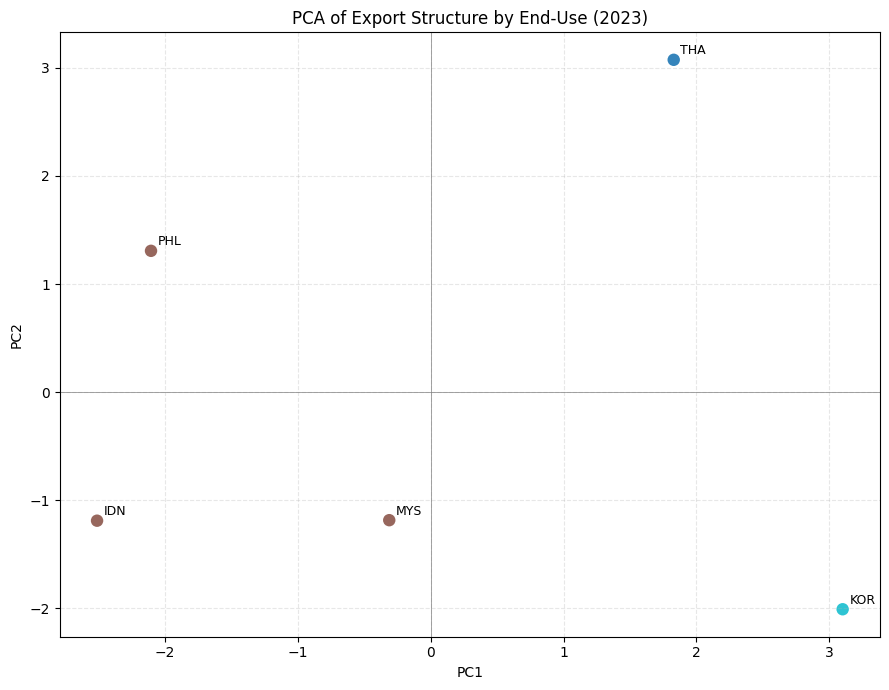

In [20]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import pandas as pd

# ==============================
# 1. เตรียม matrix สำหรับ PCA
# ==============================

X_raw = pivot.copy()

cols_for_pca = ["CAP", "CONS", "INT", "MIXED", "WASTE",
                "XCARS", "XMEDIC", "XOIL", "XPC", "XPHONE", "XPRCS"]
cols_for_pca = [c for c in cols_for_pca if c in X_raw.columns]

# 🔧 บังคับ numeric แล้ว fillna
X = (
    X_raw[cols_for_pca]
    .apply(pd.to_numeric, errors="coerce")
    .fillna(0.0)
)

# Standardize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ==============================
# 2. PCA ลดเหลือ 2 มิติ
# ==============================

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

pca_df = pd.DataFrame(X_pca, index=X_raw.index, columns=["PC1", "PC2"])

print("Explained variance ratio:", pca.explained_variance_ratio_)
print("Total explained (PC1+PC2):", pca.explained_variance_ratio_.sum())

# ==============================
# 3. KMeans clustering
# ==============================

k = 3
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
pca_df["cluster"] = kmeans.fit_predict(X_pca)

# ==============================
# 4. Plot PCA + Cluster
# ==============================

plt.figure(figsize=(9, 7))

plt.scatter(
    pca_df["PC1"],
    pca_df["PC2"],
    s=80,
    c=pca_df["cluster"],
    cmap="tab10",
    alpha=0.9,
    edgecolors="none"
)

# Label ชื่อประเทศ
for country, row in pca_df.iterrows():
    plt.text(
        row["PC1"] + 0.05,
        row["PC2"] + 0.05,
        country,
        fontsize=9
    )

plt.axhline(0, color="grey", linewidth=0.5)
plt.axvline(0, color="grey", linewidth=0.5)
plt.title("PCA of Export Structure by End-Use (2023)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.grid(True, linestyle="--", alpha=0.3)
plt.tight_layout()
plt.show()